<a href="https://colab.research.google.com/github/sbc806/scrna_mvae/blob/master/mvae_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=d3024a37b02f973be1fccea74f216a19a6f8b17f022709dfe4c87e8b382ed1ab
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=0471cba0e925203caff068bc9ec366271ef9ec8fe2b6a0a35f5c4ac829143c6e
  Stored in directory: /root/.cache/pip/wheels/6a/aa/

In [ ]:
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 23.9 MB/s eta 0:00:00


In [ ]:
!pip install louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s eta 0:00:00


In [ ]:
!pip install anndata

In [ ]:
!pip install loompy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52018 sha256=9aa6dbc7a5d6b7ef58cc4116f50e3a384340b75dd00dec3af567693f6805aa92
  Stored in directory: /root/.cache/pip/wheels/2c/22/1f/792a4621bb631e538bf1c21feae9bbaa6b19fd6d6ab382d1fd
  Created wheel for numpy-groupies: filename=numpy_groupies-0.9.22-py3-none-any.whl size=25846 sha256=e410d732bc731e105d1a4a1388ccdecd68b0543c9bf8e80f076188a7a8247428
  Stored in directory: /root/.cache/pip/wheels/5b/ce/73/9192b12bb05cc6a44ba159cb733270b1539004037302a42077
Successfully built loompy numpy-groupies


In [ ]:
!pip install geomstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 5.0 MB/s eta 0:00:00


In [ ]:
!pip install pyshp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.1 MB/s eta 0:00:00


In [105]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/dneuman/EqualEarth.git

Cloning into 'EqualEarth'...
remote: Enumerating objects: 391, done.
remote: Total 391 (delta 0), reused 0 (delta 0), pack-reused 391
Receiving objects: 100% (391/391), 3.41 MiB | 9.30 MiB/s, done.
Resolving deltas: 100% (216/216), done.


In [1]:
import anndata

import matplotlib.pyplot as plt
import numpy as np
import os as os
import pandas as pd
import scanpy as sc

In [107]:
import EqualEarth.EqualEarth
import kaleido
import matplotlib.patches as mpatches
import plotly.graph_objects as go
import plotly.io as pio
import shapefile

In [3]:
import geomstats.visualization as visualization

INFO:root:Using numpy backend


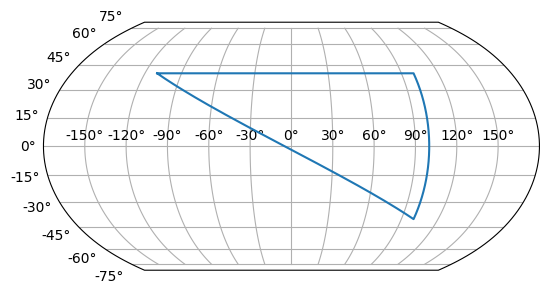

In [4]:
longs = [-110, 100, 100, -110]
lats = [40, 40, -40, 40]
fig = plt.figure('Equal Earth Projection')
ax = fig.add_subplot(111, projection='equal_earth')
ax.plot(longs, lats)
plt.grid(True)
plt.show()

# Read in data

In [5]:
dataset_path = '/content/drive/MyDrive/mvae_research/datasets'

datasets_paths = {"hela": "revelio_paper/hela/hela_select.loom",

                "DataSetS2": "cyclum_paper/DataSetS2.h5ad",

                "velocity_human": "deepcycle_paper/human/velocity_human_fibroblast.h5ad",
                "velocity_mouse": "deepcycle_paper/mouse/velocity_mouse.h5ad",

                "melanoma": "cyclum_paper/melanoma/melanoma_single_cell_revised_v2.h5ad",
                "melanoma_processed": "cyclum_paper/melanoma/melanoma_single_cell_revised_v2_processed.h5ad",
                "melanoma_78": "cyclum_paper/melanoma/melanoma_78.h5ad",

                "mouse_retina": "tricycle_paper/mouse_retina/mouse_retina_horizontal.h5ad",

                "ovarian_epithelial": "ovarian_cancer/local.h5ad",
                "ovarian_epithelial_raw": "ovarian_cancer/epithelial_count_added.h5ad",
                "ovarian_epithelial_cycling": "ovarian_cancer/ovarian_epithelial_cycling.h5ad",
                "ovarian_epithelial_cycling_raw": "ovarian_cancer/ovarian_epithelial_cycling.h5ad",

                "myeloid": "immune_cell_dataset/myeloid/CountAdded_PIP_myeloid_object_for_cellxgene.h5ad",
                "b_cells": "immune_cell_dataset/b_cells/CountAdded_PIP_B_object_for_cellxgene.h5ad",
                "t_cells": "immune_cell_dataset/CountAdded_PIP_global_object_for_cellxgene.h5ad",
                "immune_global": "immune_cell_dataset/CountAdded_PIP_global_object_for_cellxgene.h5ad",
                "myeloid_subset_1": "immune_cell_dataset/myeloid/myeloid_subset_1.h5ad",
                }

In [111]:
save_path = '/content/drive/MyDrive/mvae_research/mvae_results'
figure_save_path = '/content/scrna_mvae/figures/'
dataset_name = "mouse_retina"
full_dataset_path = os.path.join(dataset_path, datasets_paths[dataset_name])
print("Dataset:", dataset_name)

if dataset_name == "hela":
  adata = anndata.read_loom(full_dataset_path)
  save_path = os.path.join(save_path, 'hela')
  figure_save_path = os.path.join(figure_save_path, 'hela')

elif dataset_name == "DataSetS2":
  adata = sc.read_h5ad(full_dataset_path)
  adata.var['primerid'].index = np.arange(0, adata.n_vars, 1)
  save_path = os.path.join(save_path, 'DataSetS2')
  figure_save_path = os.path.join(figure_save_path, 'DataSetS2')

elif dataset_name == "velocity_human":
  adata = sc.read_h5ad(full_dataset_path)
  save_path = os.path.join(save_path, 'cell_cycle_gene_regulation/velocity_human')
  figure_save_path = os.path.join(figure_save_path, 'cell_cycle_gene_regulation/velocity_human')

elif dataset_name == "velocity_mouse":
  adata = sc.read_h5ad(full_dataset_path)
  save_path = os.path.join(save_path, 'cell_cycle_gene_regulation/velocity_mouse')
  figure_save_path = os.path.join(figure_save_path, 'cell_cycle_gene_regulation/velocity_mouse')

elif dataset_name == "mouse_retina":
  adata = sc.read_h5ad(full_dataset_path)
  save_path = os.path.join(save_path, 'tricycle_paper/mouse_retina')
  figure_save_path = os.path.join(figure_save_path,  'tricycle_paper/mouse_retina')

elif dataset_name == "melanoma":
  adata = sc.read_h5ad(full_dataset_path)
  save_path = os.path.join(save_path, 'cyclum_paper/melanoma')

elif dataset_name == "ovarian_epithelial":
  adata = sc.read_h5ad(full_dataset_path)
  save_path = os.path.join(save_path, 'ovarian/ovarian_epithelial')
  figure_save_path = os.path.join(figure_save_path, 'ovarian/ovarian_epithelial')

elif dataset_name == "ovarian_epithelial_raw":
  adata = sc.read_h5ad(full_dataset_path)

elif dataset_name == "ovarian_epithelial_cycling_raw":
  adata = sc.read_h5ad(full_dataset_path)
  adata.obsm['X_original'] = adata.X.astype(np.double)
  adata.X = adata.obsm['X_raw'].astype(np.double)
  save_path = os.path.join(save_path, 'ovarian/ovarian_epithelial_cycling')
  figure_save_path = os.path.join(figure_save_path, 'ovarian/ovarian_epithelial_cycling')

elif dataset_name == "myeloid":
  adata = sc.read_h5ad(full_dataset_path)
  save_path = os.path.join(save_path, 'immune_cell_dataset/myeloid')

elif dataset_name == "b_cells":
  adata = sc.read_h5ad(full_dataset_path)
  save_path = os.path.join(save_path, 'immune_cell_dataset/b_cells')

elif dataset_name == 't_cells':
  adata = sc.read_h5ad(full_dataset_path)
  save_path = os.path.join(save_path, 'immune_cell_dataset/t_cells')

elif dataset_name == "immune_global":
  adata = sc.read_h5ad(full_dataset_path)
  save_path = os.path.join(save_path, 'immune_cell_dataset/global')

elif dataset_name == "myeloid_subset_1":
  adata = sc.read_h5ad(full_dataset_path)
  save_path = os.path.join(save_path, 'immune_cell_dataset/myeloid_subset_1')
  figure_save_path = os.path.join(figure_save_path, 'immune_cell_dataset/myeloid_subset_1')

print(save_path)

Dataset: mouse_retina
/content/drive/MyDrive/mvae_research/mvae_results/tricycle_paper/mouse_retina


In [112]:
adata.X.shape

(107052, 27998)

In [ ]:
type_name = 'batch'
phase_name = 'ccPhase'
for each_type in np.unique(adata.obs[type_name]):
  chosen_subtype = each_type
  each_type_indices = adata.obs[type_name] == chosen_subtype

  categories = np.unique(adata.obs[phase_name])
  print(categories)
  for cat in categories:
    cat_indices = adata[each_type_indices].obs[phase_name] == cat

    print(f"Percentage of {each_type} in {cat}: {round(np.sum(cat_indices)/np.sum(each_type_indices)*100, 2)}%")

['G1.S' 'G2' 'G2.M' 'M.G1' 'S']
Percentage of Ago2KO in G1.S: 35.29%
Percentage of Ago2KO in G2: 12.66%
Percentage of Ago2KO in G2.M: 12.79%
Percentage of Ago2KO in M.G1: 22.38%
Percentage of Ago2KO in S: 16.88%
['G1.S' 'G2' 'G2.M' 'M.G1' 'S']
Percentage of WT in G1.S: 34.82%
Percentage of WT in G2: 12.52%
Percentage of WT in G2.M: 13.67%
Percentage of WT in M.G1: 20.86%
Percentage of WT in S: 18.13%


In [113]:
adata

AnnData object with n_obs × n_vars = 107052 × 27998
    obs: 'barcode', 'sample', 'age', 'Size_Factor', 'num_genes_expressed', 'Total_mRNAs', 'umap_cluster', 'umap_coord1', 'umap_coord2', 'umap_coord3', 'used_for_pseudotime', 'pattern_match', 'Patt.1', 'Patt.2', 'Patt.3', 'Patt.4', 'Patt.5', 'Patt.6', 'Patt.7', 'Patt.8', 'Patt.9', 'Patt.10', 'Patt.11', 'Patt.12', 'Patt.13', 'Patt.14', 'Patt.15', 'Patt.16', 'Patt.17', 'Patt.18', 'Patt.19', 'Patt.20', 'Patt.21', 'Patt.22', 'Patt.23', 'Patt.24', 'Patt.25', 'Patt.26', 'Patt.27', 'Patt.28', 'Patt.29', 'Patt.30', 'Patt.31', 'Patt.32', 'Patt.33', 'Patt.34', 'Patt.35', 'Patt.36', 'Patt.37', 'Patt.38', 'Patt.39', 'Patt.40', 'Patt.41', 'Patt.42', 'Patt.43', 'Patt.44', 'Patt.45', 'Patt.46', 'Patt.47', 'Patt.48', 'Patt.49', 'Patt.50', 'Patt.51', 'Patt.52', 'Patt.53', 'Patt.54', 'Patt.55', 'Patt.56', 'Patt.57', 'Patt.58', 'Patt.59', 'Patt.60', 'Patt.61', 'Patt.62', 'Patt.63', 'Patt.64', 'Patt.65', 'Patt.66', 'Patt.67', 'Patt.68', 'Patt.69', 'Patt.7

# Analyze data below

# Using PCA

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [ ]:
sc.pp.log1p(adata)

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
sc.pp.scale(adata, max_value=10)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
sc.tl.pca(adata, n_comps=50, svd_solver='arpack')

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


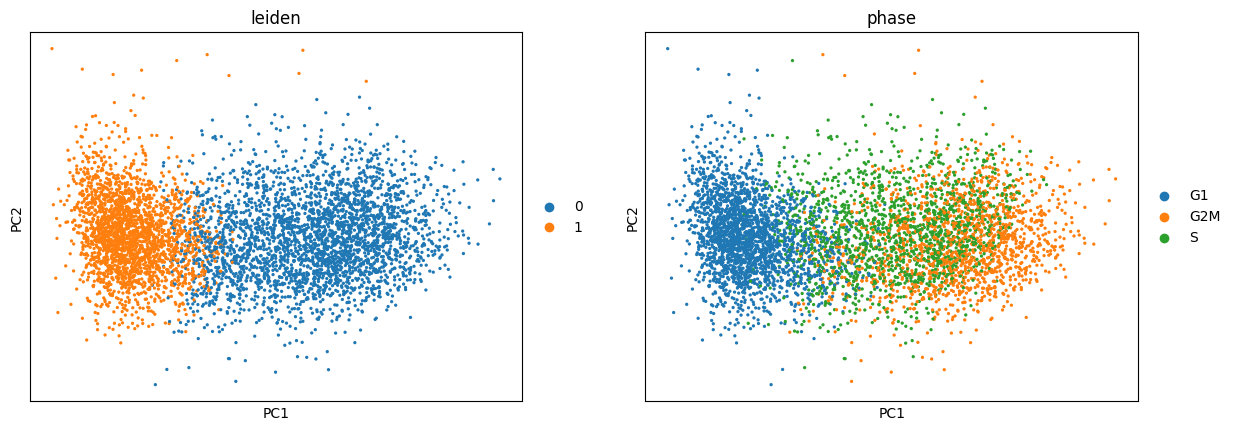

In [ ]:
desired_obs = ['leiden', 'phase']
sc.pl.pca(adata, color=desired_obs)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


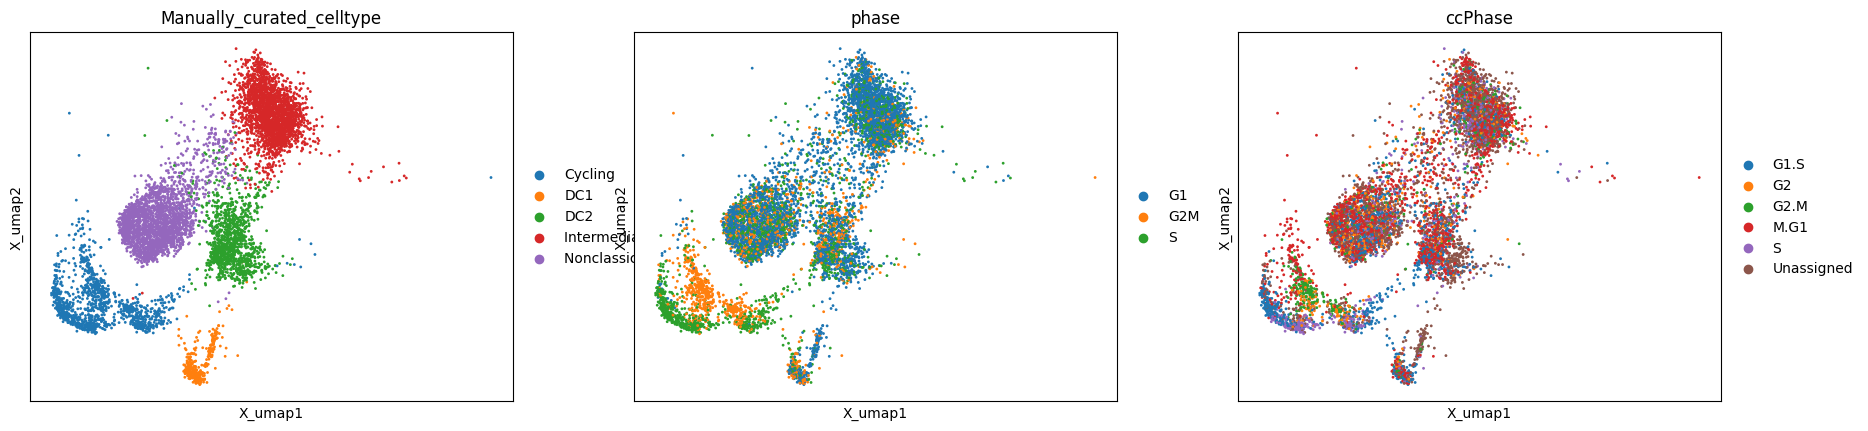

In [ ]:
sc.pl.embedding(adata, color=['Manually_curated_celltype','phase','ccPhase'], basis='X_umap', save=f"_{dataset_name}_subset.png")

In [ ]:
n_neighbors = 30
n_pcs = 10
sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)

sc.tl.umap(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


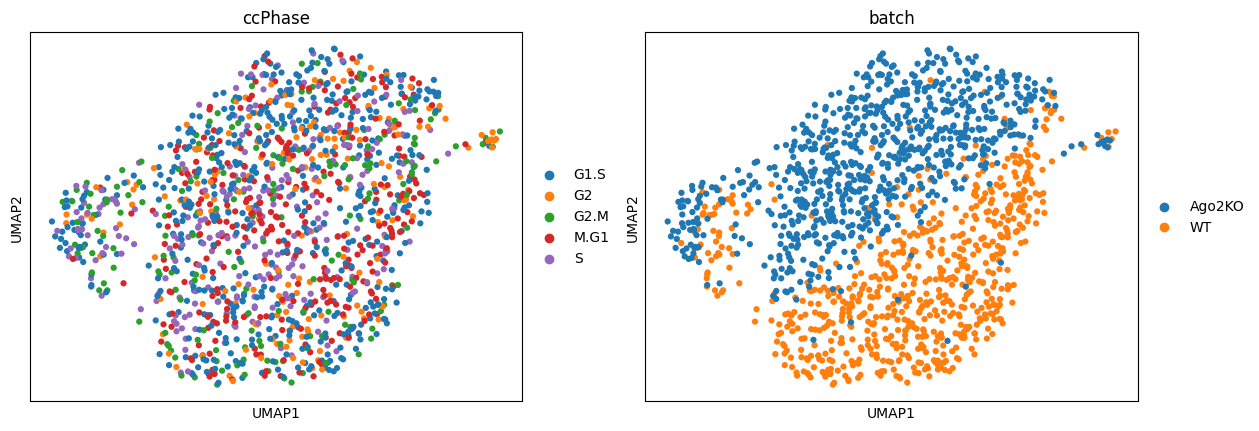

In [ ]:
desired_obs = ['ccPhase', 'batch']
sc.pl.umap(adata, color=desired_obs, save=f"_{dataset_name}_{n_neighbors}_{n_pcs}_{desired_obs}.png")

In [ ]:
sc.tl.leiden(adata)

In [ ]:
sc.tl.louvain(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


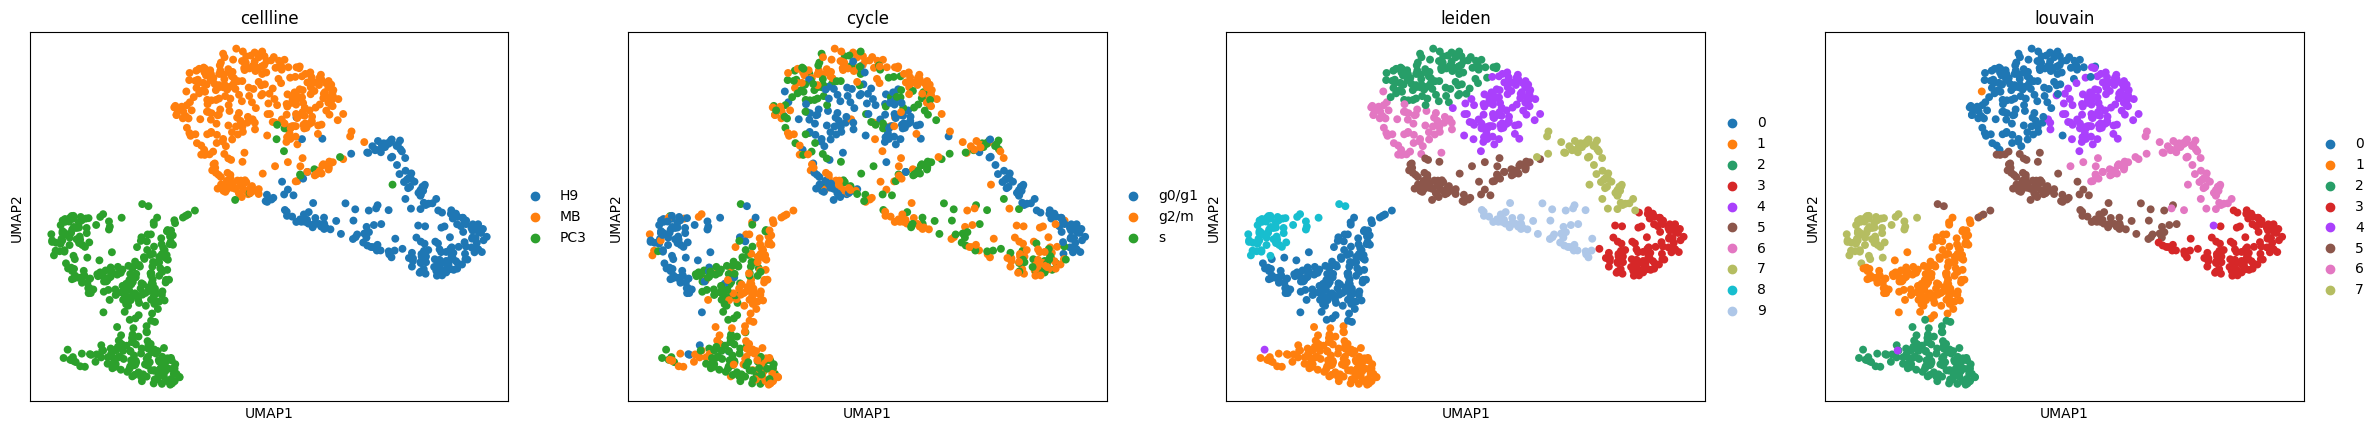

In [ ]:
desired_obs = ['Phase', 'cluster_label']
# desired_obs = desired_obs + ['leiden', 'louvain']
sc.pl.umap(adata, color=desired_obs, save=f"_{dataset_name}_computed.png")

In [ ]:
adata

AnnData object with n_obs × n_vars = 5367 × 10789
    obs: 'Clusters', '_X', '_Y', 'sample', 'n_genes', 'percent_mito', 'n_counts', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'S_score', 'G2M_score', 'phase', 'clusters_gradients', 'leiden', 'cell_cycle_theta'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'gene_count_corr'
    uns: 'ISMARA_activities', 'clusters_gradients_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_raw', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

# Working with the embeddings from the VAE

In [21]:
# Paths for saving the figures
# Make sure input number and hyperparameter number is correct
input_number = 1
hyperparameter_number = 5

input_dir = "input_" + str(input_number)
input_path = os.path.join(figure_save_path, input_dir)
if not os.path.exists(input_path):
  print("Making " + input_path)
  os.mkdir(input_path)

hyperparameter_dir = "hyperparameter_" + str(hyperparameter_number)
hyperparameter_path = os.path.join(input_path, hyperparameter_dir)
if not os.path.exists(hyperparameter_path):
  print("Making " + hyperparameter_path)
  os.mkdir(hyperparameter_path)

print(input_path)
print(hyperparameter_path)

/content/scrna_mvae/figures/hela/input_1
/content/scrna_mvae/figures/hela/input_1/hyperparameter_5


In [45]:
# The name of the moedl used to generate the embeddings
model_name = "s2, e10"

# Create a directory to hold the figures for the specific model
model_dir = "_".join(model_name.split(", "))
model_figure_save_path = os.path.join(hyperparameter_path, model_dir)
if not os.path.exists(model_figure_save_path):
  print("Making " + model_figure_save_path)
  os.mkdir(model_figure_save_path)

# Read in the text file with the lower-dimensional embeddings
embedding_name = f"{model_name}_all_encode_v63.txt"
embedding_path = os.path.join(save_path, input_dir)
embedding_path = os.path.join(embedding_path, hyperparameter_dir)
embedding_path = os.path.join(embedding_path, embedding_name)
# Read in the text file with the lower-dimensional embeddings
with open(embedding_path, 'r') as file:
    contents = file.read()

# Split the rows and convert them to floats
contents = contents.split("\n")[:-1]
if adata.X.shape[0] != len(contents):
  print("Error. contents should have the same number of rows as observations.", adata.X.shape, len(contents))

def float_list(l):
  new_l = []
  for x in l:
    new_l.append(float(x))
  return new_l

embeddings = [embedding.split(" ") for embedding in contents]
embeddings = [float_list(embedding) for embedding in embeddings]
embeddings = np.array(embeddings)
print(embeddings.shape)
adata.obsm["vae_embeddings"] = embeddings
# To do
# Needs to be able to work for more than two components and for when the first component is not only of dimension 3
adata.obsm["first_c"] = embeddings[:, 0: 3]
adata.obsm["second_c"] = embeddings[:, 3:]

(1477, 13)


In [118]:
adata

AnnData object with n_obs × n_vars = 107052 × 27998
    obs: 'barcode', 'sample', 'age', 'Size_Factor', 'num_genes_expressed', 'Total_mRNAs', 'umap_cluster', 'umap_coord1', 'umap_coord2', 'umap_coord3', 'used_for_pseudotime', 'pattern_match', 'Patt.1', 'Patt.2', 'Patt.3', 'Patt.4', 'Patt.5', 'Patt.6', 'Patt.7', 'Patt.8', 'Patt.9', 'Patt.10', 'Patt.11', 'Patt.12', 'Patt.13', 'Patt.14', 'Patt.15', 'Patt.16', 'Patt.17', 'Patt.18', 'Patt.19', 'Patt.20', 'Patt.21', 'Patt.22', 'Patt.23', 'Patt.24', 'Patt.25', 'Patt.26', 'Patt.27', 'Patt.28', 'Patt.29', 'Patt.30', 'Patt.31', 'Patt.32', 'Patt.33', 'Patt.34', 'Patt.35', 'Patt.36', 'Patt.37', 'Patt.38', 'Patt.39', 'Patt.40', 'Patt.41', 'Patt.42', 'Patt.43', 'Patt.44', 'Patt.45', 'Patt.46', 'Patt.47', 'Patt.48', 'Patt.49', 'Patt.50', 'Patt.51', 'Patt.52', 'Patt.53', 'Patt.54', 'Patt.55', 'Patt.56', 'Patt.57', 'Patt.58', 'Patt.59', 'Patt.60', 'Patt.61', 'Patt.62', 'Patt.63', 'Patt.64', 'Patt.65', 'Patt.66', 'Patt.67', 'Patt.68', 'Patt.69', 'Patt.7

# Visualization

In [64]:
import matplotlib.colors as mcolors

# Get the list of Tableau Colors
tableau_colors = list(mcolors.TABLEAU_COLORS.keys())

# Get the list of color names
color_names = tableau_colors + list(mcolors.CSS4_COLORS.keys())

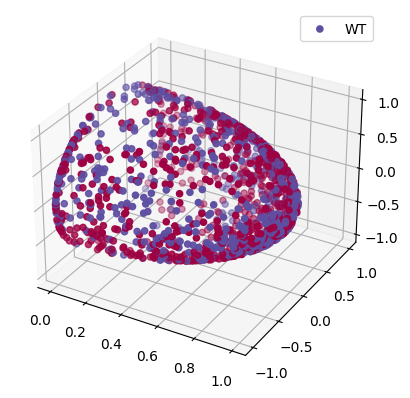

In [ ]:
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=adata.obs['batch'].rank(method='dense').astype(int), cmap='Spectral')
ax.legend(["WT", "Ago2KO"])

['G1.S' 'G2' 'G2.M' 'M.G1' 'S']


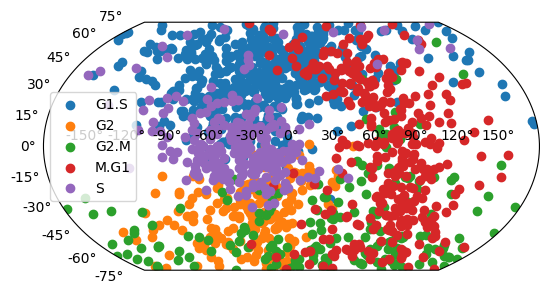

In [56]:
 desired_obs = 'ccPhase'
 desired_obs_all = adata.obs[desired_obs]
 visualize_2d(embeddings, desired_obs_all, embedding_type='discrete', projection='equal_earth')

['G1.S' 'G2' 'G2.M' 'M.G1' 'S']


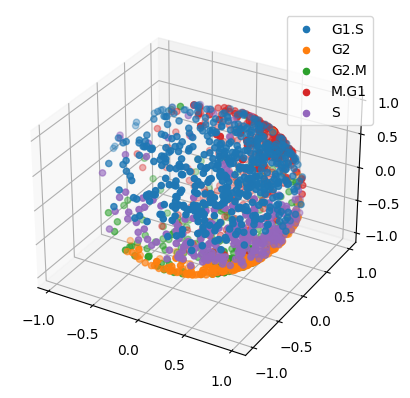

In [68]:
desired_obs = 'ccPhase'
desired_obs_all = adata.obs[desired_obs]
visualize_3d(embeddings, desired_obs_all, embedding_type='discrete')

['G1.S' 'G2' 'G2.M' 'M.G1' 'S']


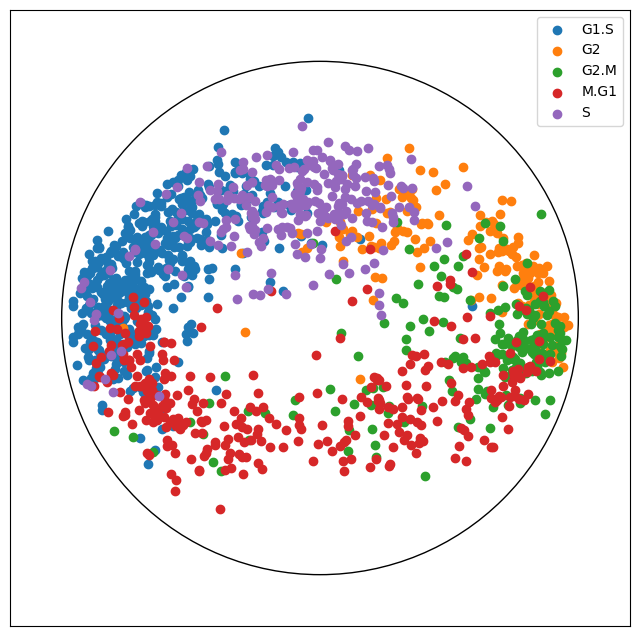

In [44]:
desired_obs = 'ccPhase'
desired_obs_all = adata.obs[desired_obs]
visualize_poincare(embeddings, desired_obs_all, embedding_type='discrete')

In [ ]:
if use_axis:
  additional = "_axis"
else:
  additional = ""
image_name = f"{model_name}_first_e2_{desired_obs}{additional}.png"
fig.savefig(os.path.join(model_figure_save_path, image_name))

In [138]:
embeddings = np.column_stack((adata.obs['umap_coord1'], adata.obs['umap_coord2'], adata.obs['umap_coord3']))
print(embeddings.shape)
desired_obs='new_CellType'
desired_obs_all=adata.obs[desired_obs]
interactive_3d_visualization(embeddings, desired_obs_all)

(29866, 3)
-5.02083980541212
4.44771243672437
-5.27689288331784 7.688831
-4.24342883061846 6.18448334510711


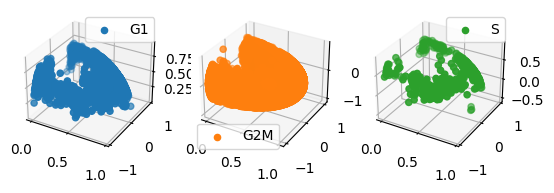

In [ ]:
# For discrete observations
# Visualizes each category in a separate plot but in one figure
# E.g., a plot for each cell type
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

desired_obs = 'Phase'

categories = np.unique(adata.obs[desired_obs])
if len(categories) % 3 == 0:
  n_rows = len(categories) // 3
else:
  n_rows = len(categories) // 3 + 1
n_cols = 3

fig = plt.figure()
position = 1
for cat in categories:
  ax = fig.add_subplot(n_rows, n_cols, position, projection='3d')
  use_axis = False
  if use_axis:
    ax.set_xticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_yticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_zticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(-1.0, 1.0)
    ax.set_zlim(-1.0, 1.0)

  cat_indices = adata.obs[desired_obs] == cat
  x_cat = x[cat_indices]
  y_cat = y[cat_indices]
  z_cat = z[cat_indices]

  ax.scatter(x_cat, y_cat, z_cat, label=cat, color=color_names[position-1])
  ax.legend()

  if use_axis:
    additional = "_axis"
  else:
    additional = ""
  image_name = f"{model_name}_first_s2_{desired_obs}_individual{additional}.png"
  fig.savefig(os.path.join(model_figure_save_path, image_name))

  position = position + 1

['G1' 'G2M' 'S']
['G1' 'G2M' 'S']


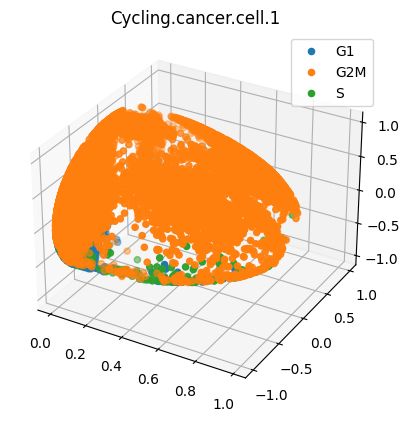

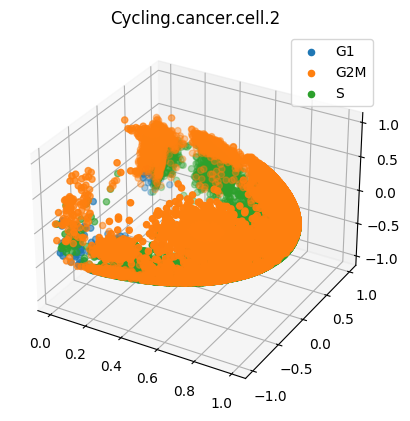

In [ ]:
# For discrete observations
# For visualizing multiple categories of one category in a plot
# E.g., the cell phases of one type each as opposed to the phases of all types together
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

first_obs = 'cluster_label'
second_obs = 'Phase'
for each_type in np.unique(adata.obs[first_obs]):
  chosen_subtype = each_type
  each_type_indices = adata.obs[first_obs] == chosen_subtype
  x_chosen = x[each_type_indices]
  y_chosen = y[each_type_indices]
  z_chosen = z[each_type_indices]

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  use_axis = False
  if use_axis:
    ax.set_xticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_yticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_zticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(-1.0, 1.0)
    ax.set_zlim(-1.0, 1.0)

  categories = np.unique(adata.obs[second_obs])
  print(categories)
  for cat in categories:
    cat_indices = adata[each_type_indices].obs[second_obs] == cat
    x_cat = x_chosen[cat_indices]
    y_cat = y_chosen[cat_indices]
    z_cat = z_chosen[cat_indices]

    ax.scatter(x_cat, y_cat, z_cat, label=cat)
    ax.set_title(each_type)
    ax.legend()
    image_name = f"{model_name}_first_s2_{each_type}_{second_obs}.png"
    fig.savefig(os.path.join(model_figure_save_path, image_name))

['G1' 'G2M' 'S']


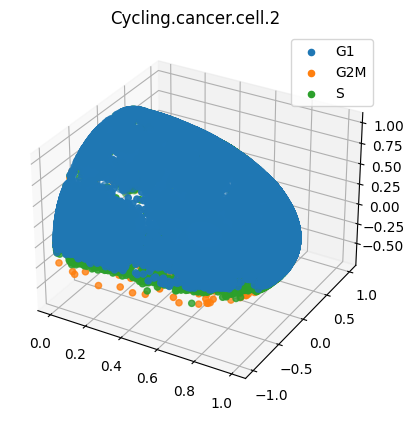

In [ ]:
# For discrete observations
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

desired_obs = 'Phase'

each_type_indices = (adata.obs['cluster_label'] == 'Cancer.cell.1') | (adata.obs['cluster_label'] == 'Cancer.cell.6')
x_chosen = x[each_type_indices]
y_chosen = y[each_type_indices]
z_chosen = z[each_type_indices]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
use_axis = False
if use_axis:
  ax.set_xticks(np.arange(-1.0, 1.01, 0.5))
  ax.set_yticks(np.arange(-1.0, 1.01, 0.5))
  ax.set_zticks(np.arange(-1.0, 1.01, 0.5))
  ax.set_xlim(-1.0, 1.0)
  ax.set_ylim(-1.0, 1.0)
  ax.set_zlim(-1.0, 1.0)

categories = np.unique(adata.obs[desired_obs])
print(categories)
for cat in categories:
  cat_indices = adata[each_type_indices].obs[desired_obs] == cat
  x_cat = x_chosen[cat_indices]
  y_cat = y_chosen[cat_indices]
  z_cat = z_chosen[cat_indices]

  ax.scatter(x_cat, y_cat, z_cat, label=cat)
  ax.set_title(each_type)
  ax.legend()

# image_name = f"{model_name}_first_s2_{each_type}_{desired_obs}.png"
# fig.savefig(os.path.join(model_figure_save_path, image_name))

In [ ]:
# adata.obsm['X_umap_original']=adata.obsm['X_umap']

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



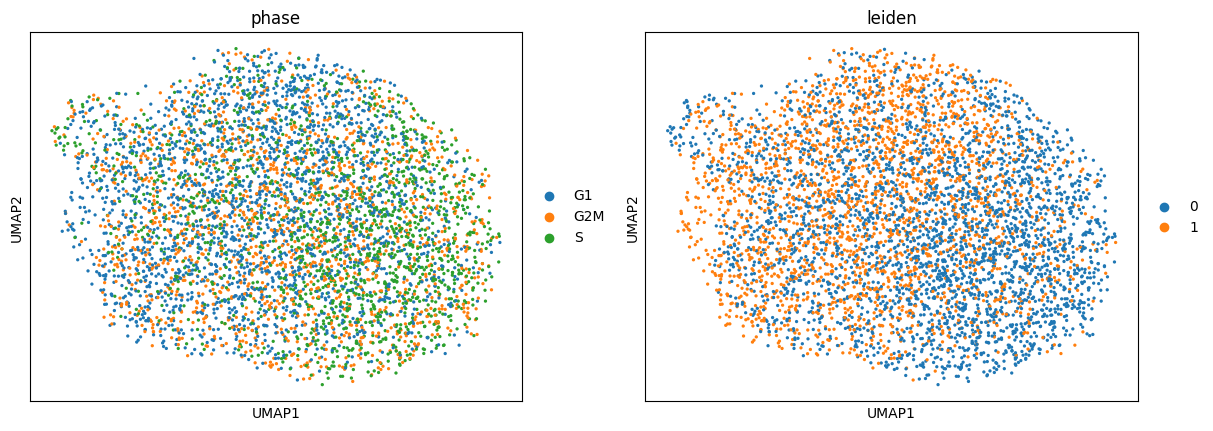

In [ ]:
compute_umap(adata,
             l_neighbors=20,
             color=['phase', 'leiden'],
             # component="first",
             n_pcs=None,
             embeddings_key="second_c",
             use_original_umap=False,
             save_figure=True)

In [ ]:
cycling=adata[adata.obs['Manually_curated_celltype']=='Cycling']

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


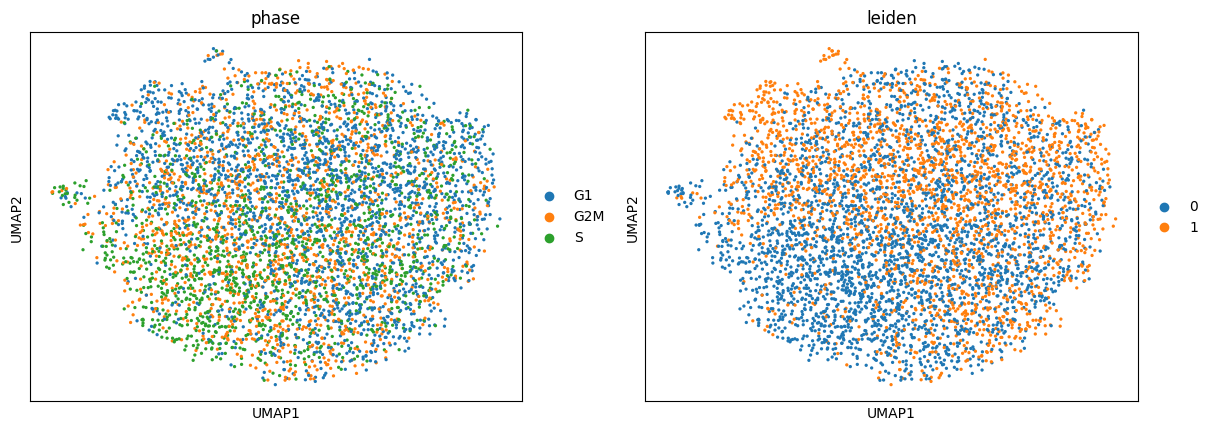

In [ ]:
compute_umap(adata,
             l_neighbors=20,
             color=['phase', 'leiden'],
             # component="first",
             n_pcs=None,
             embeddings_key="second_c",
             use_original_umap=False,
             save_figure=True,
             additional_information=[])

# Downstream clustering analysis

In [ ]:
%cd figures/hela/revelio

[Errno 2] No such file or directory: 'figures/hela/revelio'
/content/scrna_mvae/figures


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


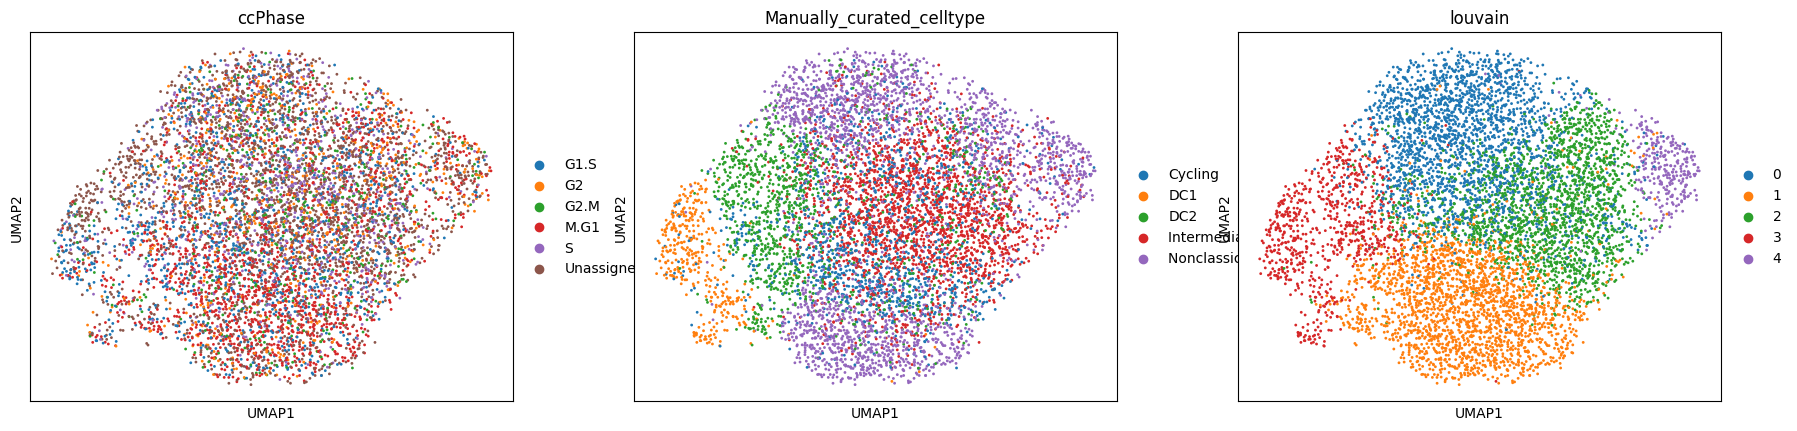

In [ ]:
# Leiden clustering
clustering_type = "louvain"
if dataset_name == "hela":
  community_clustering(adata, clustering_type,
                       l_neighbors=70,
                       l_resolution=0.4,
                       n_pcs=None, embeddings_key="first_c",
                       additional_color=['batch', 'ccPhase'],
                       use_original_umap=False, save_figure=False)
elif dataset_name == "DataSetS2":
  community_clustering(adata, clustering_type,
                       10, 0.6,
                       n_pcs=None, embeddings_key="second_c",
                       additional_color=['cycle', 'cellline'],
                       use_original_umap=False, save_figure=True)
elif dataset_name == "myeloid":
  community_clustering(adata, clustering_type, 10, 0.6,
                    n_pcs=None, use_original_umap=True, save_figure=True)
elif dataset_name == "myeloid_subset_1":
  community_clustering(adata, clustering_type,
                       l_neighbors=20,
                       l_resolution=0.5,
                       n_pcs=None, embeddings_key="second_c",
                       additional_color=['ccPhase', 'Manually_curated_celltype'],
                       use_original_umap=False, save_figure=True)
elif dataset_name == "t-cells":
  community_clustering(adata, clustering_type, 10, 0.6,
                    n_pcs=None, use_original_umap=True, save_figure=False)
elif dataset_name == "b-cells":
  community_clustering(adata, clustering_type, 10, 0.6,
                    n_pcs=None, use_original_umap=True, save_figure=False)
else:
  raise NotImplementedError

In [ ]:
adata = hela_revelio_adata
true_labels = ["batch"]
# If using kmeans, need to specify number of clusters at end
# For example, if want to calculate the score for kmeans with 8 clusters, should
# put kmeans8
clustering_methods = ["leiden"]
for clustering in clustering_methods:
  for label in true_labels:

    y_pred = ["Ago2KO" if value == "0" else "WT" for value in adata.obs[clustering]]
    print("Accuracy", label, clustering, accuracy_score(adata.obs[label], y_pred))
    print("ARI", label, clustering, adjusted_rand_score(adata.obs[label], adata.obs[clustering]))
    print("AMI", label, clustering, adjusted_mutual_info_score(adata.obs[label], adata.obs[clustering]))
    print("NMI", label, clustering, normalized_mutual_info_score(adata.obs[label], adata.obs[clustering]))

Accuracy batch leiden 0.8232904536222072
ARI batch leiden 0.4176641770810562
AMI batch leiden 0.32554690761470484
NMI batch leiden 0.3258777542317232


In [ ]:
as_number=adata.obs['batch'].rank(method='dense').astype(int)

In [ ]:
leiden_number=adata.obs['leiden'].rank(method='dense').astype(int)

In [ ]:
louvain_number=adata.obs['louvain'].rank(method='dense').astype(int)

In [ ]:
np.sum(as_number.values==louvain_number.values)

235

In [ ]:
np.sum(as_number.values!=louvain_number.values)

1242

In [ ]:
def compute_umap(adata,
                         l_neighbors,
                         color,
                         # component,
                         n_pcs=None, embeddings_key="vae_embeddings",
                         use_original_umap=True, save_figure=False,
                 additional_information=[]):
  """
  Clustering.
  l_neighbors: The number of neighbors to use when creating the neighborhood map.
  n_pcs: Dimension to use when computing neighborhood map.
  color: A list of colors to display the UMAP in.
  component: A string that indicates which component of the model it is such as first or second.

  If save_figure=True, saves to a directory called figures with the following
  information in the image name
  data name,
  model
  dimension of embeddings
  dimension used to compute neighbors map,
  number of neighbors
  original if use_original_umap is True and computed otherwise
  """
  if n_pcs is None:
    n_pcs = adata.obsm[embeddings_key].shape[1]
  sc.pp.neighbors(adata, n_neighbors=l_neighbors, n_pcs=n_pcs, use_rep=embeddings_key)
  # bbknn.bbknn(adata, batch_key="Donor", neighbors_within_batch=l_neighbors)

  # Warning, the umap in X.obsm["umap"] is overwritten with the original umap when
  # set to True
  # Otherwise, X.obsm["umap"] is overwritten with the new umap
  if use_original_umap:
    adata.obsm["X_umap"] = adata.obsm["X_umap_original"]
  else:
    sc.tl.umap(adata)

  save=None
  if save_figure:
    information = [dataset_name,
                   model_name,
                   str(n_pcs),
                   embeddings_key,
                   str(l_neighbors),
                   "original" if use_original_umap else "computed"
                   ]+additional_information
    save = "_" + "_".join(information) + ".png"
  sc.pl.umap(adata, color=color, save=save)

In [ ]:
# Leiden or Louvain clustering
def community_clustering(adata, clustering_type,
                         l_neighbors, l_resolution,
                         n_pcs=None, embeddings_key="vae_embeddings",
                         additional_color=[],
                         use_original_umap=True, save_figure=False):
  """
  Clustering.
  l_neighbors: The number of neighbors to use when creating the neighborhood map.
  l_resolution: Controls coarseness of clustering. Higher values means more clusters.
  n_pcs: Dimension to use when computing neighborhood map.

  additional_color: A list of other obs to visualize besides the clustering.
  If save_figure=True, saves to a directory called figures with the following
  information in the image name
  data name (myeloid, t-cells or b-cells),
  distribution
  dimension of embeddings
  clustering method,
  dimension used to compute neighbors map,
  number of neighbors
  resolution starting with an r, for example r0_6 is r0.6
  original if use_original_umap is True and computed otherwise
  """
  if n_pcs is None:
    n_pcs = adata.obsm[embeddings_key].shape[1]
  sc.pp.neighbors(adata, n_neighbors=l_neighbors, n_pcs=n_pcs, use_rep=embeddings_key)
  # bbknn.bbknn(adata, batch_key="Donor", neighbors_within_batch=l_neighbors)
  if clustering_type == "leiden":
    sc.tl.leiden(adata, resolution=l_resolution)
  else:
    sc.tl.louvain(adata, resolution=l_resolution)

  # Warning, the umap in X.obsm["umap"] is overwritten with the original umap when
  # set to True
  # Otherwise, X.obsm["umap"] is overwritten with the new umap
  if use_original_umap:
    adata.obsm["X_umap"] = adata.obsm["X_umap_original"]
  else:
    sc.tl.umap(adata)

  save=None
  if save_figure:
    information = [dataset_name,
                   clustering_type,
                   str(n_pcs),
                   embeddings_key,
                   str(l_neighbors),
                   "r" + "_".join(str(l_resolution).split(".")),
                   "original" if use_original_umap else "computed"
                   ]
    save = "_" + "_".join(information) + ".png"
  sc.pl.umap(adata, color=additional_color+[clustering_type], save=save)

# Reading in R data from paper

In [66]:
!pip install rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314909 sha256=8096e1d780a37d6382c1f5fd362e2dc22aa2d2a30c0e1bfed67dffe02a59a920
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [9]:
import rpy2.robjects as robjects

# Load the RDS file
cell_info_rdata = robjects.r['readRDS']('/content/drive/MyDrive/mvae_research/datasets/revelio_paper/hela/cellInfo.rds')

# Convert the R object to a Python object
cell_info_rdf = robjects.conversion.rpy2py(cell_info_rdata)

INFO:rpy2.situation:cffi mode is CFFI_MODE.ANY
INFO:rpy2.situation:R home found: /usr/lib/R
INFO:rpy2.situation:R library path: /usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
INFO:rpy2.situation:LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
INFO:rpy2.rinterface_lib.embedded:Default options to initialize R: rpy2, --quiet, --no-save
INFO:rpy2.rinterface_lib.embedded:R is already initialized. No need to initialize.


In [10]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

# Assume you have a R DataFrame object called 'r_dataframe'

# Convert the R DataFrame to a pandas DataFrame
cell_info_df = pandas2ri.rpy2py_dataframe(cell_info_rdf)

# Access and work with the pandas DataFrame
print(cell_info_df.shape)

(1477, 22)


In [11]:
number_phase = {}
for i  in range(0, len(cell_info_rdf[5])):
  if cell_info_rdf[5][i] not in number_phase:
    number_phase[cell_info_rdf[5][i]] = str(cell_info_rdf[5].rx(i+1)).split("\n")[0].split(" ")[1]

In [12]:
cell_phases = []
for each_id in adata.obs['obs_names']:
  cell_phases.append(number_phase[cell_info_df.loc[each_id]['ccPhase']])

In [13]:
wt_phases = []
ago_phases = []
for each_id in adata.obs['obs_names']:

  if each_id.split("_")[0] == "WT":
    wt_phases.append(cell_info_df.loc[each_id]['ccPhase'])
  else:
    ago_phases.append(cell_info_df.loc[each_id]['ccPhase'])

In [14]:
for i in range(0, 5):
  print(np.sum(np.array(wt_phases) == (i+1))/len(wt_phases))
  print(np.sum(np.array(ago_phases)==i+1)/len(ago_phases))

0.34820143884892085
0.35294117647058826
0.18129496402877698
0.16879795396419436
0.1251798561151079
0.1265984654731458
0.1366906474820144
0.1278772378516624
0.20863309352517986
0.2237851662404092


In [15]:
adata.obs['ccPhase'] = np.array(cell_phases)

In [16]:
cell_info_df

datasetID  batchID               cellID     nUMI   nGene  \
WT_CTTGTAGCGTCT              1        1      WT_CTTGTAGCGTCT  69992.0  9258.0   
WT_AATTTAAACTTG              1        1      WT_AATTTAAACTTG  61152.0  8480.0   
WT_GACAACCTCATC              1        1      WT_GACAACCTCATC  64340.0  9067.0   
WT_ACCATACACACG              1        1      WT_ACCATACACACG  64509.0  8794.0   
WT_TTTCAGGCAGAC              1        1      WT_TTTCAGGCAGAC  60750.0  8468.0   
...                        ...      ...                  ...      ...     ...   
Ago2KO_ACCCTCTCTTCG          1        2  Ago2KO_ACCCTCTCTTCG   2398.0  1263.0   
Ago2KO_AAGCATTTAAGT          1        2  Ago2KO_AAGCATTTAAGT   2366.0  1356.0   
Ago2KO_TGCGTCTAGGTG          1        2  Ago2KO_TGCGTCTAGGTG   2366.0  1401.0   
Ago2KO_GAACACTTAAAN          1        2  Ago2KO_GAACACTTAAAN   1786.0  1235.0   
Ago2KO_GCCTAACAATCN          1        2  Ago2KO_GCCTAACAATCN   1922.0  1218.0   

                     ccPhase  meanOfPhaseScore  sdOfPhaseScore  \
WT_CTTGTAGCGTCT            3          0.839807        0.164922   
WT_AATTTAAACTTG            3          0.823897        0.300220   
WT_GACAACCTCATC            2          0.792590        0.105933   
WT_ACCATACACACG            2          0.812380        0.166171   
WT_TTTCAGGCAGAC            1          0.750271        0.104091   
...                      ...               ...             ...   
Ago2KO_ACCCTCTCTTCG        4          0.448854        0.244173   
Ago2KO_AAGCATTTAAGT        3          0.452088        0.186871   
Ago2KO_TGCGTCTAGGTG        1          0.581197        0.150326   
Ago2KO_GAACACTTAAAN        2          0.599961        0.256379   
Ago2KO_GCCTAACAATCN        4          0.606649        0.189368   

                     highestPhaseScore  secondHighestPhaseScore  ...  \
WT_CTTGTAGCGTCT               1.562848                 0.043129  ...   
WT_AATTTAAACTTG               0.839078                 0.567795  ...   
WT_GACAACCTCATC               1.116656                 1.043807  ...   
WT_ACCATACACACG               1.531466                 0.321670  ...   
WT_TTTCAGGCAGAC               1.112661                 1.029624  ...   
...                                ...                      ...  ...   
Ago2KO_ACCCTCTCTTCG           1.582362                 0.298585  ...   
Ago2KO_AAGCATTTAAGT           1.607494                 0.258965  ...   
Ago2KO_TGCGTCTAGGTG           1.220573                 0.855944  ...   
Ago2KO_GAACACTTAAAN           1.204970                 0.403889  ...   
Ago2KO_GCCTAACAATCN           1.005849                 1.005445  ...   

                           G2      G2.M      M.G1  G1.S_zScore  S_zScore  \
WT_CTTGTAGCGTCT      0.909788  0.920057  1.033136    -0.360485 -0.052627   
WT_AATTTAAACTTG      0.973003  1.003933  1.119779    -1.597609 -0.353527   
WT_GACAACCTCATC      0.726336  0.692273  0.964066     1.043807  1.116656   
WT_ACCATACACACG      0.816240  0.819492  1.067900    -0.651277  1.531466   
WT_TTTCAGGCAGAC      0.703728  0.655337  0.926849     1.112661  1.029624   
...                       ...       ...       ...          ...       ...   
Ago2KO_ACCCTCTCTTCG  0.334904  0.649169  0.761425    -0.834169 -0.809105   
Ago2KO_AAGCATTTAAGT  0.395812  0.418694  0.768517    -0.468501 -0.423060   
Ago2KO_TGCGTCTAGGTG  0.427712  0.456060  0.781964     1.220573  0.855944   
Ago2KO_GAACACTTAAAN  0.506165  0.676395  0.887230    -1.480814  1.204970   
Ago2KO_GCCTAACAATCN  0.651173  0.823528  0.721373    -0.338982 -0.354427   

                     G2_zScore  G2.M_zScore  M.G1_zScore  \
WT_CTTGTAGCGTCT       1.562848     0.043129    -1.192865   
WT_AATTTAAACTTG       0.839078     0.567795     0.544262   
WT_GACAACCTCATC      -0.524066    -0.976318    -0.660080   
WT_ACCATACACACG      -0.151070    -1.050789     0.321670   
WT_TTTCAGGCAGAC      -0.404171    -0.987348    -0.750766   
...                        ...          ...          ...   
Ago2KO_ACCCTCTCTTCG   0.298585     1.582362    -0.237672 

In [17]:
str(cell_info_rdf[5].rx(1)).split("\n")[0].split(" ")[1]

'G2'

In [ ]:
cell_info_rdf[5]

<rpy2.robjects.vectors.FactorVector object at 0x7befc161b780> [RTYPES.INTSXP]
R classes: ('factor',)
[G2, G2, S, S, ..., G2, G1.S, S, G2.M]

In [18]:
adata

AnnData object with n_obs × n_vars = 1477 × 4545
    obs: 'barcode', 'batch', 'obs_names', 'ccPhase'
    var: 'gene_symbols', 'var_names'

In [ ]:
for cat in adata.obs['cellline'].cat.categories:
  print(cat)
  for phase in adata.obs['cycle'].cat.categories:
    print(f"Percentage of {phase}: {np.sum(adata[adata.obs['cellline']==cat].obs['cycle']==phase)/np.sum(adata.obs['cellline']==cat)}")

## Get hela data without cell cycle effects

In [65]:
import rpy2.robjects as robjects

# Load the RDS file
hela_without_cc_effects_rdata = robjects.r['readRDS']('/content/drive/MyDrive/mvae_research/datasets/revelio_paper/hela/hela_without_cc_effects_revelio.rds')

# Convert the R object to a Python object
hela_without_cc_effects_rdf = robjects.conversion.rpy2py(hela_without_cc_effects_rdata)

INFO:rpy2.situation:cffi mode is CFFI_MODE.ANY
INFO:rpy2.situation:R home found: /usr/lib/R
INFO:rpy2.situation:R library path: /usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
INFO:rpy2.situation:LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
INFO:rpy2.rinterface_lib.embedded:Default options to initialize R: rpy2, --quiet, --no-save
INFO:rpy2.rinterface_lib.embedded:R is already initialized. No need to initialize.


In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

# Assume you have a R DataFrame object called 'r_dataframe'

# Convert the R DataFrame to a pandas DataFrame
hela_without_cc_effects_df = pandas2ri.rpy2py_dataframe(hela_without_cc_effects_rdf)

# Access and work with the pandas DataFrame
print(hela_without_cc_effects_df.shape)

(1322, 1477)


In [ ]:
hela_without_cc_effects_df = hela_without_cc_effects_df.T

In [ ]:
hela_without_cc_effects_df

ABCC2     ABCC5   ABHD14A     ABHD3     ABHD6  \
WT_CTTGTAGCGTCT      0.701451  0.294666  0.428255  0.034081  0.499175   
WT_AATTTAAACTTG      0.548700 -0.036698 -0.411706 -0.084685  0.174253   
WT_GACAACCTCATC      0.060529 -0.166241  0.791582 -0.308345  0.103871   
WT_ACCATACACACG      0.305874 -0.145356  0.452220 -0.562183 -0.374923   
WT_TTTCAGGCAGAC      0.089559 -0.095668  0.463687 -0.561679  0.557502   
...                       ...       ...       ...       ...       ...   
Ago2KO_ACCCTCTCTTCG -1.067949 -0.331362 -0.421112 -0.589476 -0.556824   
Ago2KO_AAGCATTTAAGT -1.095235 -0.327992 -0.472210 -0.633950 -0.610150   
Ago2KO_TGCGTCTAGGTG  2.381526 -0.546322 -0.547492 -0.873513 -0.526696   
Ago2KO_GAACACTTAAAN -1.160668 -0.370268 -0.468852 -0.663806  5.484516   
Ago2KO_GCCTAACAATCN  2.583245  5.567624 -0.495548 -0.893288 -0.411993   

                     AC006262.5  AC009005.2  AC093323.3  AC124789.1     ACAP2  \
WT_CTTGTAGCGTCT        0.047924    1.356763   -0.430013    0.037631 -0.251135   
WT_AATTTAAACTTG        1.366409   -0.134693    0.045312   -0.367394  0.798251   
WT_GACAACCTCATC       -0.114549    0.188045   -0.308239    1.377393 -0.318031   
WT_ACCATACACACG       -0.879608    0.197637    0.574423    1.136739  0.625620   
WT_TTTCAGGCAGAC       -0.125022    0.650195    0.643899   -0.004058 -0.258264   
...                         ...         ...         ...         ...       ...   
Ago2KO_ACCCTCTCTTCG   -0.616823   -0.398005   -0.652328   -0.314311 -0.673250   
Ago2KO_AAGCATTTAAGT   -0.547751   -0.384157   -0.610069   -0.377431 -0.715928   
Ago2KO_TGCGTCTAGGTG   -1.029858   -0.571656   -0.398964   -0.525136  2.830998   
Ago2KO_GAACACTTAAAN    2.972833   -0.424223   -0.584813   -0.383587 -0.736002   
Ago2KO_GCCTAACAATCN    2.203717   -0.663360   -0.386345   -0.481401 -0.902256   

                     ...    ZNF195     ZNF24    ZNF260    ZNF33B    ZNF37A  \
WT_CTTGTAGCGTCT      ...  0.568120  0.026115 -0.360992 -0.037548  0.011383   
WT_AATTTAAACTTG      ... -0.371579  0.081798 -0.356322  0.477869 -0.454349   
WT_GACAACCTCATC      ... -0.374421  0.448071 -0.365260  1.091886 -0.431211   
WT_ACCATACACACG      ... -0.367848  0.680562 -0.354327 -0.512576  1.179583   
WT_TTTCAGGCAGAC      ...  0.674931  0.181277  0.124401  0.001818  0.081984   
...                  ...       ...       ...       ...       ...       ...   
Ago2KO_ACCCTCTCTTCG  ...  5.264308 -0.677556 -0.504205 -0.459688 -0.517407   
Ago2KO_AAGCATTTAAGT  ... -0.496409 -0.633596 -0.533234 -0.473314 -0.518879   
Ago2KO_TGCGTCTAGGTG  ... -0.438575 -0.587993 -0.455467 -0.515174 -0.467952   
Ago2KO_GAACACTTAAAN  ... -0.478898  4.250657  5.287354 -0.476522 -0.508782   
Ago2KO_GCCTAACAATCN  ... -0.386766  4.098492 -0.380952 -0.509457 -0.446631   

                       ZNF480    ZNF544    ZNF638    ZNF714     ZRSR2  
WT_CTTGTAGCGTCT      0.137018  0.453607  0.285588  1.437510  0.465251  
WT_AATTTAAACTTG      0.178446  0.840198 -0.169996 -0.522122  0.604875  
WT_GACAACCTCATC      0.659872  0.278979  0.517019  0.086664  0.482769  
WT_ACCATACACACG     -0.289402  0.568421  0.655498  0.151532  0.503984  
WT_TTTCAGGCAGAC      1.060288  0.302984  0.258769  1.057834 -0.516238  
...                       ...       ...       ...       ...       ...  
Ago2KO_ACCCTCTCTTCG -0.604050 -0.722629  2.452982 -0.442407 -0.388360  
Ago2KO_AAGCATTTAAGT -0.617664 -0.692043 -0.878395 -0.511257 -0.408728  
Ago2KO_TGCGTCTAGGTG -0.425815 -0.573371  4.251872 -0.690816 -0.495407  
Ago2KO_GAACACTTAAAN -0.576859 -0.680189  2.920989 -0.521446 -0.418063  
Ago2KO_GCCTAACAATCN -0.332851 -0.576979  2.680020  4.440530 -0.495863  

[1477 rows x 1322 columns]

In [ ]:
np.sum(adata.obs['barcode'].values==hela_without_cc_effects_df.index)

1477

In [ ]:
# Assuming you have a pandas DataFrame called 'df' with annotation information
df = hela_without_cc_effects_df

# Create an empty AnnData object
hela_revelio_adata = sc.AnnData(df.values)

# Assign the values from the DataFrame to the 'X' attribute
hela_revelio_adata.X = df.values

# Set the column names as the variable (gene) names
hela_revelio_adata.var_names = df.columns

# Set the row names as the observation (cell) names
hela_revelio_adata.obs_names = df.index

hela_revelio_adata.obs['ccPhase']=adata.obs['ccPhase'].values
hela_revelio_adata.obs['batch']=adata.obs['batch'].values

# Print the summary of the AnnData object
print(hela_revelio_adata)


AnnData object with n_obs × n_vars = 1477 × 1322
    obs: 'ccPhase', 'batch'


In [ ]:
# Assuming you have a pandas DataFrame called 'df' with annotation information
df = hela_without_cc_effects_df

# Create an empty AnnData object
second_adata = sc.AnnData(adata.obsm["second_c"])

# Set the column names as the variable (gene) names
# second_adata.var_names = df.columns

# Set the row names as the observation (cell) names
second_adata.obs_names = df.index

second_adata.obs['ccPhase']=adata.obs['ccPhase'].values
second_adata.obs['batch']=adata.obs['batch'].values

# Print the summary of the AnnData object
print(second_adata)


AnnData object with n_obs × n_vars = 1477 × 10
    obs: 'ccPhase', 'batch'


In [ ]:
hela_revelio_adata.obs['ccPhase']

WT_CTTGTAGCGTCT          G2
WT_AATTTAAACTTG          G2
WT_GACAACCTCATC           S
WT_ACCATACACACG           S
WT_TTTCAGGCAGAC        G1.S
                       ... 
Ago2KO_ACCCTCTCTTCG    G2.M
Ago2KO_AAGCATTTAAGT      G2
Ago2KO_TGCGTCTAGGTG    G1.S
Ago2KO_GAACACTTAAAN       S
Ago2KO_GCCTAACAATCN    G2.M
Name: ccPhase, Length: 1477, dtype: category
Categories (5, object): ['G1.S', 'G2', 'G2.M', 'M.G1', 'S']

In [ ]:
hela_adata = adata

# Choosing a subset of the cells

In [ ]:
def obtain_subset_indices(adata, obs_key, desired_types):
  subset_indices = adata.obs[obs_key] == desired_types[0]
  for i in range(1, len(desired_types)):
    subset_indices = subset_indices | (adata.obs[obs_key] == desired_types[i])
  return subset_indices

In [ ]:
# def obtain_subset(adata, obs_key, desired_types):
  # subset = adata.X[adata.obs[obs_key] == desired_types[0]]

  # for i in range(1, len(desired_types)):
    # next_subset = adata.X[adata.obs[obs_key] == desired_types[i]]
    # subset = np.vstack((subset.todense(), next_subset.todense()))
  # return subset

In [ ]:
subset_indices = obtain_subset_indices(adata, 'cluster_label', [# 'Cycling.cancer.cell.2',
                                                      'Cycling.cancer.cell.1',
                                                      # 'Cancer.cell.1',
                                                      # 'Cancer.cell.6',
                                                      ])

In [ ]:
adata = adata[subset_indices]

# Helper Functions

In [94]:
import plotly.express as px

# Get the default colors used for traces in Plotly Express
default_colors = px.colors.qualitative.Plotly

print(default_colors)


['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']


In [55]:
def visualize_2d(embeddings, desired_obs_all, embedding_type="discrete", projection=None):

  # For visualizing 2-dimensional embeddings
  x = embeddings[:, 0]
  y = embeddings[:, 1]
  if projection == "equal_earth":
    z = embeddings[:, 2]
    x, y = cartesian_to_spherical_multiple(x, y, z)

  desired_obs = 'ccPhase'

  fig = plt.figure()
  if projection == "equal_earth":
    ax = fig.add_subplot(111, projection=projection)
  else:
    ax = fig.add_subplot(111)

  if embedding_type == "discrete":
    categories = np.unique(adata.obs[desired_obs])
    print(categories)
    for cat in categories:
      cat_indices = desired_obs_all == cat
      x_cat = x[cat_indices]
      y_cat = y[cat_indices]

      ax.scatter(x_cat, y_cat, label=cat)
  ax.legend()

In [42]:
def visualize_3d(embeddings, desired_obs_all, embedding_type="discrete", use_axis=False):

  x = embeddings[:, 0]
  y = embeddings[:, 1]
  z = embeddings[:, 2]

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  if use_axis:
    ax.set_xticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_yticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_zticks(np.arange(-1.0, 1.01, 0.5))
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(-1.0, 1.0)
    ax.set_zlim(-1.0, 1.0)

  if embedding_type == "discrete":
    categories = np.unique(desired_obs_all)
    print(categories)
    for cat in categories:
      cat_indices = desired_obs_all == cat
      x_cat = x[cat_indices]
      y_cat = y[cat_indices]
      z_cat = z[cat_indices]
      ax.scatter(x_cat, y_cat, z_cat, label=cat)
  else:
    scatter = ax.scatter(x, y, z, c=desired_obs_all, cmap=plt.cm.viridis)
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Cell Cycle Theta')
  ax.legend()

In [137]:
def interactive_3d_visualization(embeddings, desired_obs_all):

  # Create a meshgrid for the angles
  # phi, theta = np.linspace(0, np.pi, 100), np.linspace(0, 2 * np.pi, 100)
  # PHI, THETA = np.meshgrid(phi, theta)

  # Convert angles to Cartesian coordinates
  # x = np.sin(PHI) * np.cos(THETA)
  # y = np.sin(PHI) * np.sin(THETA)
  # z = np.cos(PHI)

  x = embeddings[:, 0]
  y = embeddings[:, 1]
  z = embeddings[:, 2]
  print(min(x))
  print(max(x))
  print(min(y), max(y))
  print(min(z), max(z))
  # Create the 3D scatter plot
  fig = go.Figure()
  categories = np.unique(desired_obs_all)
  for i, cat in enumerate(categories):
    cat_indices = desired_obs_all == cat
    x_cat = x[cat_indices]
    y_cat = y[cat_indices]
    z_cat = z[cat_indices]
    fig.add_trace(go.Scatter3d(x=x_cat,
                               y=y_cat,
                               z=z_cat,
                               mode='markers',
                               marker=dict(color=default_colors[i]),
                               legendgroup=cat,
                               name=cat))

  # Set plot title and axis labels
  fig.update_layout(
    # title='Interactive 3D Sphere',
      scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
      )
  )

  fig.show()
  # Save the figure as an interactive HTML file
  pio.write_html(fig, file=os.path.join(figure_save_path, f'{dataset_name}_{desired_obs}_used_for_pseudotime_interactive.html'))

  # Save the figure as an image (e.g., PNG)
  # pio.write_image(fig, file='output_plot.png', format='png')


In [41]:
def visualize_poincare(embeddings, desired_obs_all, embedding_type="discrete"):
  x = embeddings[:, 0]
  y = embeddings[:, 1]
  z = embeddings[:, 2]

  circle = visualization.PoincareDisk(coords_type="ball")

  fig, ax = plt.subplots(figsize=(8, 8))
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  circle.set_ax(ax)
  circle.draw(ax=ax)

  if embedding_type == "discrete":
    categories = np.unique(desired_obs_all)
    print(categories)
    for cat in categories:

      cat_indices = desired_obs_all == cat
      x_cat = x[cat_indices]
      y_cat = y[cat_indices]
      z_cat = z[cat_indices]

      x_p_1, x_p_2 = lorentz_to_poincare(x_cat, y_cat, z_cat)
      ax.scatter(x_p_1, x_p_2, label=cat)
  else:
    x_p_1, x_p_2 = lorentz_to_poincare(x, y, z)
    scatter = ax.scatter(x_p_1, x_p_2, c=desired_obs_all, cmap=plt.cm.viridis)
  ax.legend()


In [26]:
import math

def cartesian_to_spherical(x, y, z):
    # Calculate longitude (λ)
    lon = math.atan2(y, x)

    # Calculate latitude (φ)
    lat = math.atan2(z, math.sqrt(x**2 + y**2))

    # Convert radians to degrees
    lon = math.degrees(lon)
    lat = math.degrees(lat)

    return lon, lat

# Example coordinates on a sphere
x = 0.5
y = 0.866
z = 0.0

# Convert to longitude and latitude
longitude, latitude = cartesian_to_spherical(x, y, z)

print(f"Longitude: {longitude} degrees")
print(f"Latitude: {latitude} degrees")


Longitude: 59.999272219172624 degrees
Latitude: 0.0 degrees


In [27]:
import math

def cartesian_to_spherical_multiple(x, y, z):
    # Calculate longitude (λ)
    lon = np.arctan2(y, x)

    # Calculate latitude (φ)
    lat = np.arctan2(z, np.sqrt(x**2 + y**2))

    # Convert radians to degrees
    lon = np.degrees(lon)
    lat = np.degrees(lat)

    return lon, lat

# Example coordinates on a sphere
x = 0.5
y = 0.866
z = 0.0

# Convert to longitude and latitude
longitude, latitude = cartesian_to_spherical_multiple(np.array([x, x]), np.array([y, y]), np.array([z, z]))

print(f"Longitude: {longitude} degrees")
print(f"Latitude: {latitude} degrees")


Longitude: [59.99927222 59.99927222] degrees
Latitude: [0. 0.] degrees


In [28]:
def lorentz_to_poincare(x, y, z):
  """
  Converts lorentz coordinates to coordinates on the Poincare ball.
  x: An array of x coordinates.
  y: An array of y coordinates.
  z: An array of z coordinates.

  Returns the coordinates on the Poincare ball, x_p_1 and x_p_2.
  """
  x_p_1 = y / (1 + x)
  x_p_2 = z / (1 + x)
  return x_p_1, x_p_2